In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
plt.style.use('fivethirtyeight')


In [ ]:
# large = 22; med = 16; small = 12

# params = {'axes.titlesize': large,
#           'legend.fontsize': med,
#           'figure.figsize': (16, 10),
#           'axes.labelsize': med,
#           'axes.titlesize': med,
#           'xtick.labelsize': med,
#           'ytick.labelsize': med,
#           'figure.titlesize': large}

# plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
# sns.set_style("white")
# %matplotlib inline

# # Version
# print(mpl.__version__)  #> 3.0.0
# print(sns.__version__)  #> 0.9.0

In [2]:
internal_marks = pd.read_excel(".\waec_dataset.xlsx",skiprows = 3,
                   sheet_name = " INTERNAL MARKS",names = ['Eng1','Eng2','Eng3','Math1','Math2','Math3','Int1','Int2','Int3'])
internal_marks.head()

,,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
1.0,2040900119,45,41,44,51,47,41,40,45,69
2.0,2040900219,56,57,60,52,44,51,43,54,55
3.0,2040900319,41,45,54,42,54,44,48,52,42
4.0,2040900419,43,40,41,43,51,43,39,45,44
5.0,2040900519,55,54,45,66,55,52,62,60,45


In [3]:
internal_marks = internal_marks.reset_index()
internal_marks.head(2)

,level_0,level_1,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,1.0,2040900119,45,41,44,51,47,41,40,45,69
1,2.0,2040900219,56,57,60,52,44,51,43,54,55


In [4]:
internal_marks = internal_marks.drop(columns = ['level_0'],axis = 1) 
internal_marks.head(2)

,level_1,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,2040900119,45,41,44,51,47,41,40,45,69
1,2040900219,56,57,60,52,44,51,43,54,55


In [5]:
internal_marks = internal_marks.rename(columns= {"level_1":"index"})
internal_marks.head(2)

,index,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,2040900119,45,41,44,51,47,41,40,45,69
1,2040900219,56,57,60,52,44,51,43,54,55


In [6]:
def fix_wasce_data_columns(dataframe:pd.DataFrame)-> pd.DataFrame:
    dataframe = dataframe.drop(columns = [r'S\NO.'],axis = 1)
    dataframe = dataframe.rename(columns= {"INDEX NO.":"index"})
    lower_columns = lambda x:[i.lower().replace(".","_").replace(" ","") for i in x.columns]
    new_columns = lower_columns(dataframe)
    dataframe.columns = new_columns
    
    return dataframe

In [7]:
wasce_2019 = pd.read_excel(".\waec_dataset.xlsx",skiprows = 3, sheet_name = "2019 WASSCE")
wasce_2019.head()

,S\NO.,INDEX NO.,ENGLISH,MATHEMATICS,INT. SCI
0,NaN,2040900119,B2,D7,B3
1,NaN,2040900219,C5,B3,B3
2,NaN,2040900319,C4,B3,B2
3,NaN,2040900419,E8,D7,C4
4,NaN,2040900519,F9,D7,C6


In [8]:
wasce_2019 = fix_wasce_data_columns(wasce_2019)
wasce_2019.head()

,index,english,mathematics,int_sci
0,2040900119,B2,D7,B3
1,2040900219,C5,B3,B3
2,2040900319,C4,B3,B2
3,2040900419,E8,D7,C4
4,2040900519,F9,D7,C6


In [9]:
wasce_2020 = pd.read_excel(".\waec_dataset.xlsx",skiprows = 3, sheet_name = "2020 WASSCE")
wasce_2020.head()

,S\NO.,INDEX NO.,ENGLISH,MATHEMATICS,INT. SCI
0,NaN,2040900120,E8,C6,D7
1,NaN,2040900220,D7,B3,C5
2,NaN,2040900320,E8,E8,E8
3,NaN,2040900420,E8,B3,D7
4,NaN,2040900520,C6,A1,C5


In [10]:
wasce_2020 = fix_wasce_data_columns(wasce_2020)
wasce_2020.head()

,index,english,mathematics,int_sci
0,2040900120,E8,C6,D7
1,2040900220,D7,B3,C5
2,2040900320,E8,E8,E8
3,2040900420,E8,B3,D7
4,2040900520,C6,A1,C5


In [11]:
wasce_2021 = pd.read_excel(".\waec_dataset.xlsx",skiprows = 3, sheet_name = " 2021 WASSCE")
wasce_2021.head()

,S\NO.,INDEX NO.,ENGLISH,MATHEMATICS,INT. SCI
0,NaN,2040900121,F9,F9,E8
1,NaN,2040900221,F9,F9,F9
2,NaN,2040900321,F9,F9,E8
3,NaN,2040900421,F9,F9,F9
4,NaN,2040900521,F9,F9,E8


In [12]:
wasce_2021 = fix_wasce_data_columns(wasce_2021)
wasce_2021.head()

,index,english,mathematics,int_sci
0,2040900121,F9,F9,E8
1,2040900221,F9,F9,F9
2,2040900321,F9,F9,E8
3,2040900421,F9,F9,F9
4,2040900521,F9,F9,E8


In [13]:
wasce = pd.concat([wasce_2019,wasce_2020,wasce_2021],axis = 0)
wasce.head()

,index,english,mathematics,int_sci
0,2040900119,B2,D7,B3
1,2040900219,C5,B3,B3
2,2040900319,C4,B3,B2
3,2040900419,E8,D7,C4
4,2040900519,F9,D7,C6


In [14]:
wasce.dtypes

index           int64
english        object
mathematics    object
int_sci        object
dtype: object

In [15]:
wasce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 365
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        999 non-null    int64 
 1   english      998 non-null    object
 2   mathematics  998 non-null    object
 3   int_sci      998 non-null    object
dtypes: int64(1), object(3)
memory usage: 39.0+ KB


In [16]:
internal_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1089 non-null   int64
 1   Eng1    1089 non-null   int64
 2   Eng2    1089 non-null   int64
 3   Eng3    1089 non-null   int64
 4   Math1   1089 non-null   int64
 5   Math2   1089 non-null   int64
 6   Math3   1089 non-null   int64
 7   Int1    1089 non-null   int64
 8   Int2    1089 non-null   int64
 9   Int3    1089 non-null   int64
dtypes: int64(10)
memory usage: 85.2 KB


In [17]:
#run once - setting index column as index in wasce and internal_marks

wasce = wasce.set_index("index")
internal_marks = internal_marks.set_index("index")

In [18]:
internal_marks.head(2)

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
index,,,,,,,,,
2040900119,45,41,44,51,47,41,40,45,69
2040900219,56,57,60,52,44,51,43,54,55


In [19]:
wasce.head(2)

,english,mathematics,int_sci
index,,,
2040900119,B2,D7,B3
2040900219,C5,B3,B3


# Analysis Focus - Internal Marks

In [20]:
internal_marks.describe()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,56.103765,52.955005,45.409550,56.323232,54.228650,46.286501,53.282828,51.378329,43.047750
std,16.313205,17.070701,19.025171,17.079190,17.436336,18.801024,17.376796,17.509402,19.438192
min,10.000000,10.000000,8.000000,10.000000,9.000000,8.000000,9.000000,9.000000,8.000000
25%,45.000000,43.000000,30.000000,45.000000,44.000000,32.000000,44.000000,40.000000,30.000000
50%,56.000000,55.000000,50.000000,56.000000,56.000000,50.000000,55.000000,55.000000,45.000000
75%,67.000000,67.000000,60.000000,67.000000,67.000000,60.000000,66.000000,66.000000,60.000000
max,88.000000,88.000000,87.000000,88.000000,87.000000,80.000000,88.000000,88.000000,87.000000


In [21]:
internal_marks.isna().any()

Eng1     False
Eng2     False
Eng3     False
Math1    False
Math2    False
Math3    False
Int1     False
Int2     False
Int3     False
dtype: bool

In [22]:
internal_marks.head()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
index,,,,,,,,,
2040900119,45,41,44,51,47,41,40,45,69
2040900219,56,57,60,52,44,51,43,54,55
2040900319,41,45,54,42,54,44,48,52,42
2040900419,43,40,41,43,51,43,39,45,44
2040900519,55,54,45,66,55,52,62,60,45


<Figure size 800x640 with 0 Axes>

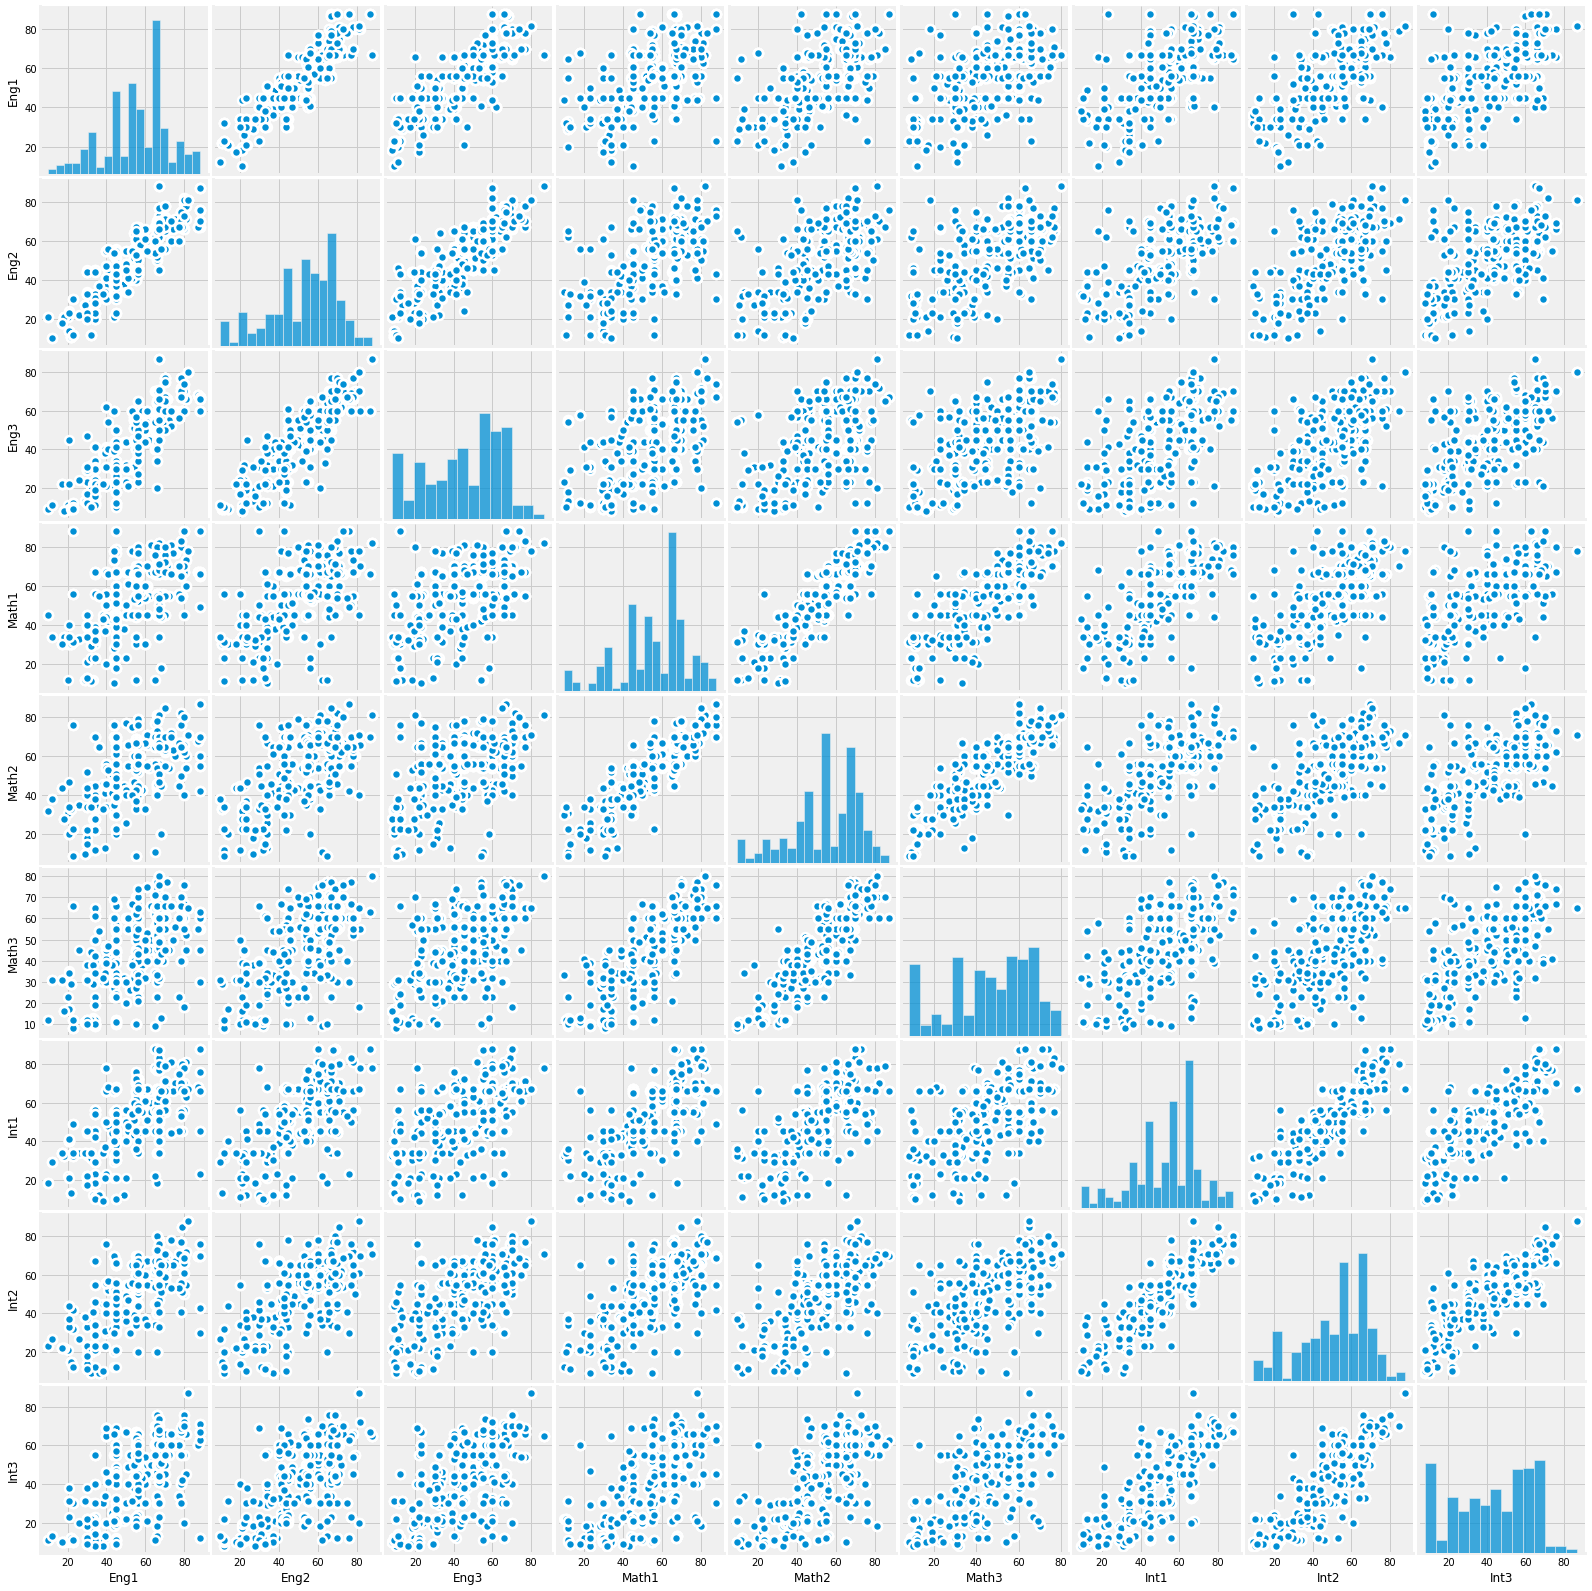

In [262]:
plt.figure(figsize=(10,8), dpi= 80);
sns.pairplot(internal_marks, kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show();

In [24]:
internal_marks.corr()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
Eng1,1.000000,0.885328,0.825777,0.514100,0.547072,0.529956,0.577333,0.636577,0.573584
Eng2,0.885328,1.000000,0.874021,0.542977,0.586688,0.589530,0.587743,0.623503,0.586425
Eng3,0.825777,0.874021,1.000000,0.464400,0.513882,0.556778,0.555655,0.627881,0.606217
Math1,0.514100,0.542977,0.464400,1.000000,0.878816,0.823687,0.583355,0.625155,0.595778
Math2,0.547072,0.586688,0.513882,0.878816,1.000000,0.870854,0.589286,0.616853,0.637279
Math3,0.529956,0.589530,0.556778,0.823687,0.870854,1.000000,0.557384,0.615096,0.649606
Int1,0.577333,0.587743,0.555655,0.583355,0.589286,0.557384,1.000000,0.857233,0.797554
Int2,0.636577,0.623503,0.627881,0.625155,0.616853,0.615096,0.857233,1.000000,0.859699
Int3,0.573584,0.586425,0.606217,0.595778,0.637279,0.649606,0.797554,0.859699,1.000000


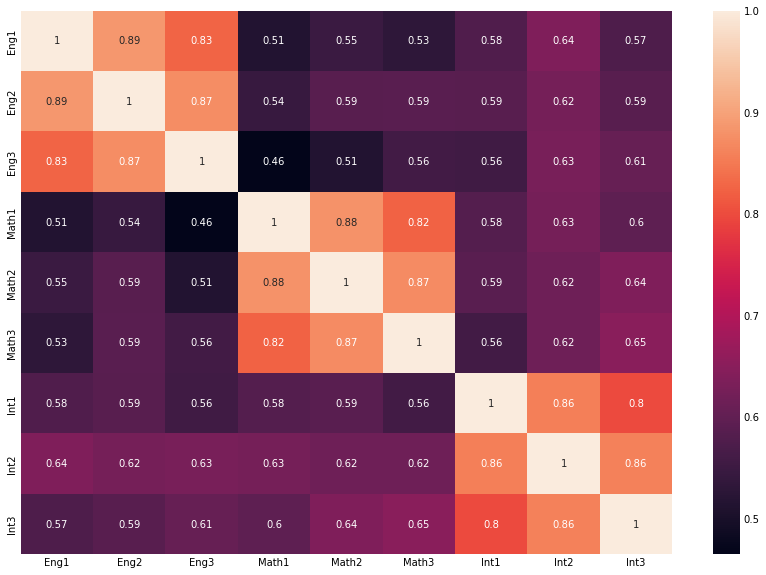

In [25]:
plt.figure(figsize = (13,10))
sns.heatmap(internal_marks.corr(),annot = True);

In [26]:
internal_marks.corr()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
Eng1,1.000000,0.885328,0.825777,0.514100,0.547072,0.529956,0.577333,0.636577,0.573584
Eng2,0.885328,1.000000,0.874021,0.542977,0.586688,0.589530,0.587743,0.623503,0.586425
Eng3,0.825777,0.874021,1.000000,0.464400,0.513882,0.556778,0.555655,0.627881,0.606217
Math1,0.514100,0.542977,0.464400,1.000000,0.878816,0.823687,0.583355,0.625155,0.595778
Math2,0.547072,0.586688,0.513882,0.878816,1.000000,0.870854,0.589286,0.616853,0.637279
Math3,0.529956,0.589530,0.556778,0.823687,0.870854,1.000000,0.557384,0.615096,0.649606
Int1,0.577333,0.587743,0.555655,0.583355,0.589286,0.557384,1.000000,0.857233,0.797554
Int2,0.636577,0.623503,0.627881,0.625155,0.616853,0.615096,0.857233,1.000000,0.859699
Int3,0.573584,0.586425,0.606217,0.595778,0.637279,0.649606,0.797554,0.859699,1.000000


#### Explore the relationship between student performance in a subject from first year to third year

In [276]:
def scatterPlot3D(*,data,x,y,z,xlabel,ylabel,zlabel,size = (13,11),title,color = 'r'):
    fig = plt.figure(figsize = (13,11))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[x], data[y],data[z], c=color, marker='o')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.show()

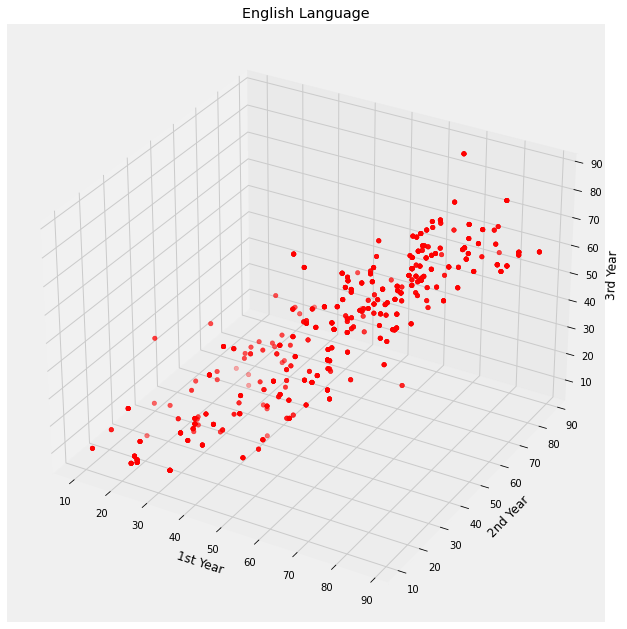

In [39]:
#Relationship Between English Language Scores over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Eng1',y = 'Eng2',z = 'Eng3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'English Language')

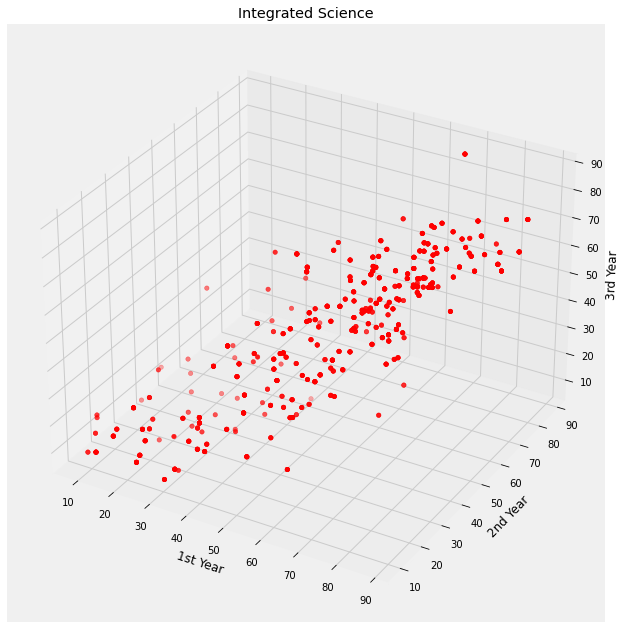

In [40]:
#Relationship Between Integrated Science Score over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Int1',y = 'Int2',z = 'Int3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'Integrated Science')

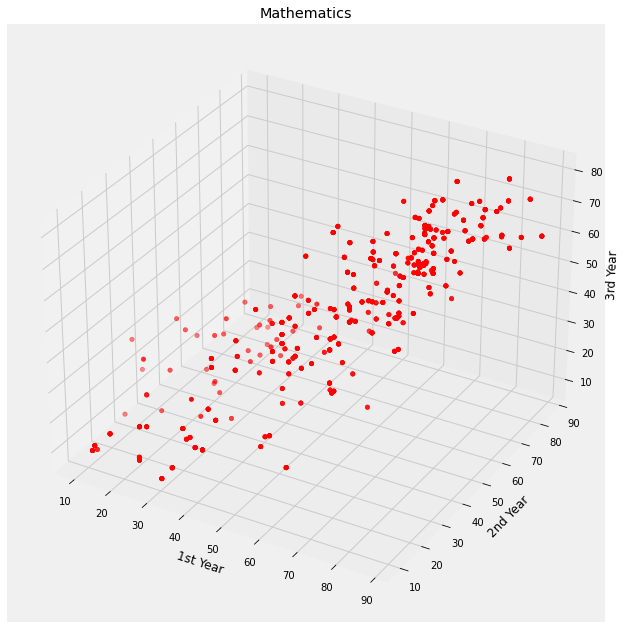

In [41]:
#Relationship Between Mathematics Scores over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Math1',y = 'Math2',z = 'Math3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'Mathematics')

In [42]:
#there is a strong positive correlation between the individual subjects over the 3 year period

In [43]:
internal_marks.head()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
index,,,,,,,,,
2040900119,45,41,44,51,47,41,40,45,69
2040900219,56,57,60,52,44,51,43,54,55
2040900319,41,45,54,42,54,44,48,52,42
2040900419,43,40,41,43,51,43,39,45,44
2040900519,55,54,45,66,55,52,62,60,45


#### Explore the relationship between student's performance in the 3 different subjects | year by year

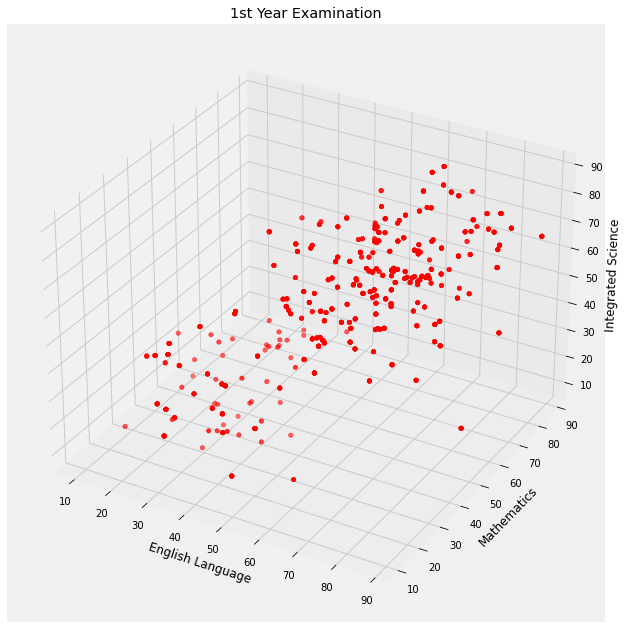

In [44]:
scatterPlot3D(data = internal_marks,
              x = 'Eng1',y = 'Math1',z = 'Int1',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '1st Year Examination')

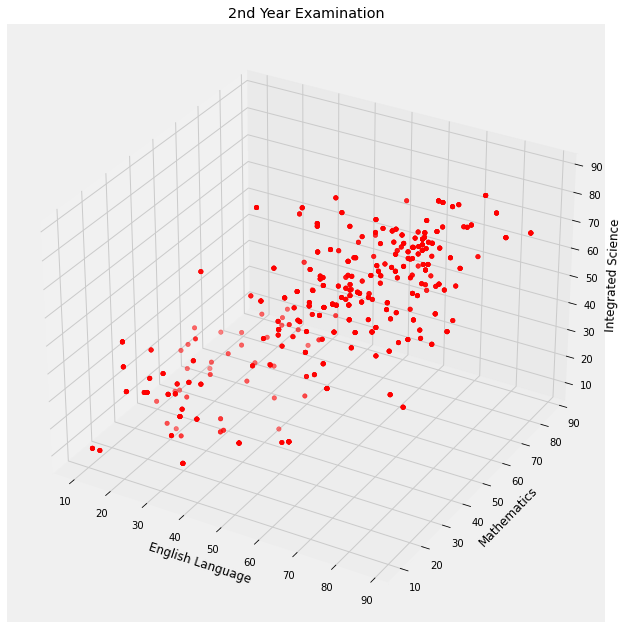

In [45]:
scatterPlot3D(data = internal_marks,
              x = 'Eng2',y = 'Math2',z = 'Int2',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '2nd Year Examination')

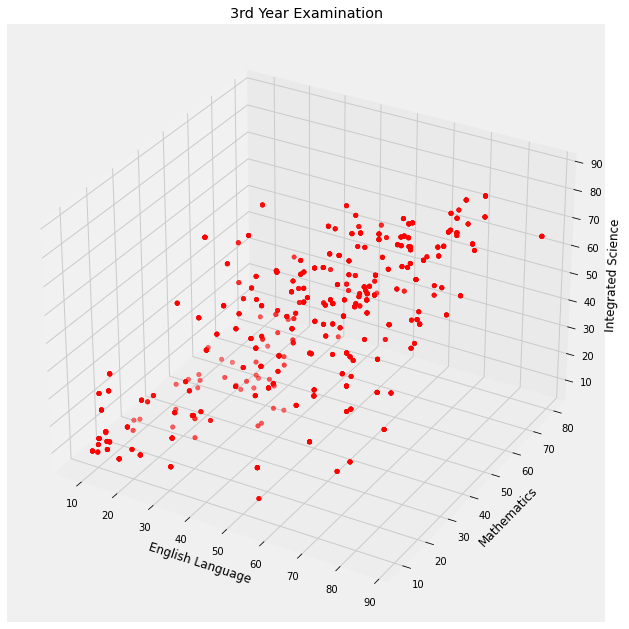

In [46]:
scatterPlot3D(data = internal_marks,
              x = 'Eng3',y = 'Math3',z = 'Int3',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '3rd Year Examination')

In [212]:
#get the average score of each student per subject
def getAverageMarks(data,subject):
    
    column = lambda x: [i for i in data.columns if i.startswith(x)]
    
    sample = data[column(subject)]
    
    total_score = sample.sum(axis = 1)
    
    average_score  = total_score/sample.shape[1]
    
    average_score
    
    return pd.DataFrame(average_score,columns = [subject])

In [217]:
def concatFrames(func):
    
    func = func()
    
    def wrap():
    
        start_time = time.time()
        
        try:
            
            english = func(data = internal_marks,subject = 'Eng') #get average data for english
            
            math = func(data = internal_marks,subject = 'Math')  #get average data for math
            
            science = func(data = internal_marks,subject = 'Int') #get average data for integrated science
        
        except Exception as exc:
        
            print("Error In Function {}".format(func.__name__))
        
            raise exc
            
        data = pd.concat([english,math,science],axis = 1)
        #concatenate dataframes
        
        print("#check nulls#\n\n{}".format(data.isna().any()))
        print("\nExecution Successful \nExecution Time : {} secs".format(round(time.time() - start_time),5))
        return data
        
    return wrap

In [218]:
@concatFrames
def summarizeData():
    return getAverageMarks

In [248]:
#this will generate a new dataframe which we will refer to as end of track (eot)
internal_marks_avg = summarizeData()

#check nulls#

Eng     False
Math    False
Int     False
dtype: bool

Execution Successful 
Execution Time : 0 secs


In [233]:
internal_marks_avg.describe()

,Eng,Math,Int
count,1089.000000,1089.000000,1089.000000
mean,51.489440,52.279461,49.236302
std,16.642885,16.906846,17.101003
min,11.000000,10.333333,9.000000
25%,41.000000,41.333333,37.333333
50%,55.000000,55.666667,52.333333
75%,63.666667,65.333333,62.333333
max,81.000000,81.333333,81.333333


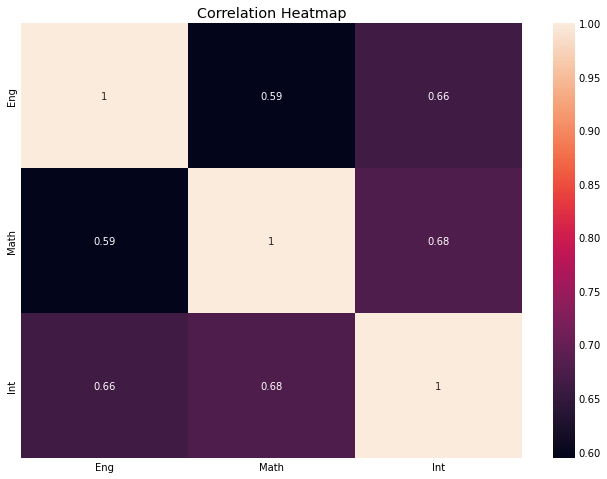

In [313]:
plt.figure(figsize = (10,8))
sns.heatmap(internal_marks_avg.corr(),annot = True);
plt.title("Correlation Heatmap");

<Figure size 800x640 with 0 Axes>

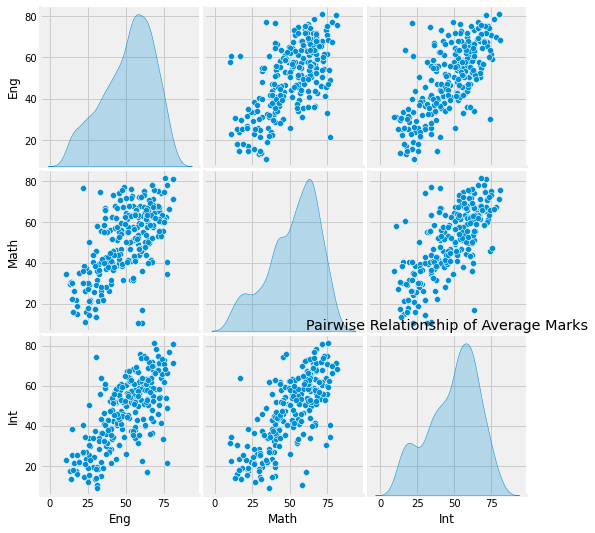

In [317]:
plt.figure(figsize=(10,8), dpi= 80);
sns.pairplot(internal_marks_avg, kind = "scatter", diag_kind = 'kde');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.title('Pairwise Relationship of Average Marks');
plt.show();

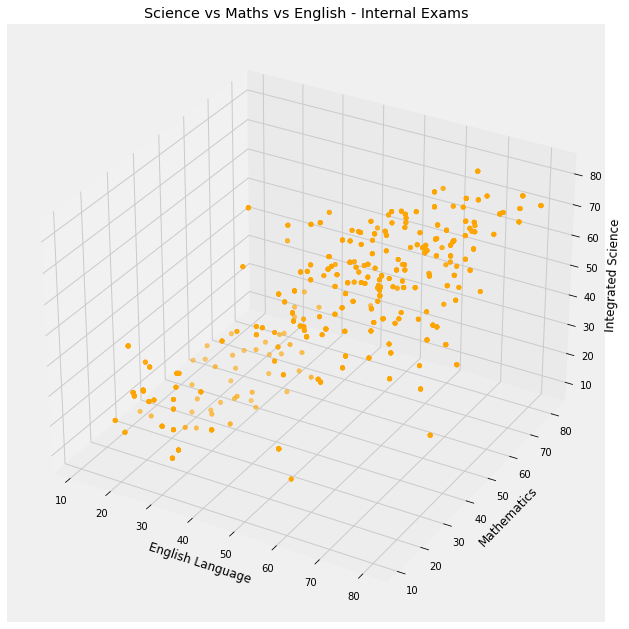

In [277]:
scatterPlot3D(data = internal_marks_avg,
              x = 'Eng',y = 'Math',z = 'Int',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = 'Science vs Maths vs English - Internal Exams',color = 'orange')

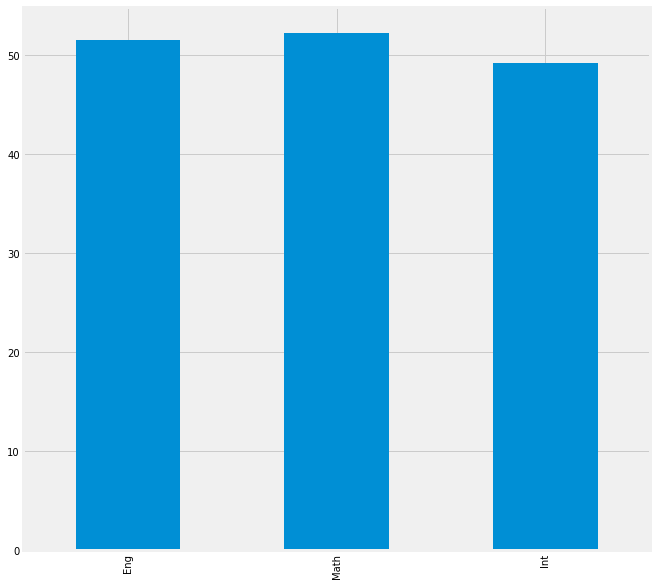

In [244]:
plt.figure(figsize = (10,10));
internal_marks_avg.mean().plot(kind = 'bar');

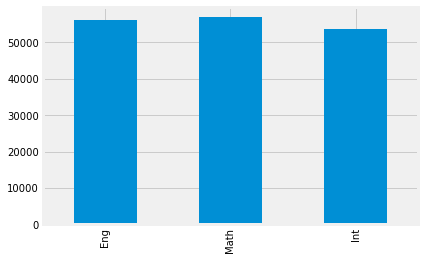

In [316]:
internal_marks_avg.sum().plot(kind = 'bar');

## Analysis Focus - Wasce Grades

In [319]:
wasce.head()

,english,mathematics,int_sci
index,,,
2040900119,B2,D7,B3
2040900219,C5,B3,B3
2040900319,C4,B3,B2
2040900419,E8,D7,C4
2040900519,F9,D7,C6


In [246]:
 2+7

7.25 ns ± 0.0142 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [212]:
internal_marks.join(other = wasce,on = 'index',how = 'left')

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3,english,mathematics,int_sci
index,,,,,,,,,,,,
2040900119,45,41,44,51,47,41,40,45,69,B2,D7,B3
2040900219,56,57,60,52,44,51,43,54,55,C5,B3,B3
2040900319,41,45,54,42,54,44,48,52,42,C4,B3,B2
2040900419,43,40,41,43,51,43,39,45,44,E8,D7,C4
2040900519,55,54,45,66,55,52,62,60,45,F9,D7,C6
...,...,...,...,...,...,...,...,...,...,...,...,...
2040936321,56,45,41,77,76,74,67,55,56,F9,F9,D7
2040936421,67,66,55,48,47,49,51,41,30,F9,E8,D7
2040936521,34,44,19,37,38,34,42,23,20,E8,F9,D7
